# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Olayinka Afolabi

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [132]:
# TODO: Import dataset and inspect the first five columns
filePath = 'seeds_dataset.txt'
separator = '	'
# Read the text file into a dataframe
data = pd.read_csv(filePath, sep = separator,  header = None)

#Assign meaniful column names

column_names = ['feature_1','feature_2','feature_3','feature_4','feature_5','feature_6', 'feature_7', 'Target']

data.columns = column_names

#inspect the first rows of the dataframe
print(data.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      15.26      14.84     0.8710      5.763      3.312      2.221   
1      14.88      14.57     0.8811      5.554      3.333      1.018   
2      14.29      14.09     0.9050      5.291      3.337      2.699   
3      13.84      13.94     0.8955      5.324      3.379      2.259   
4      16.14      14.99     0.9034      5.658      3.562      1.355   

   feature_7  Target  
0      5.220       1  
1      4.956       1  
2      4.825       1  
3      4.805       1  
4      5.175       1  


Next, you will need to separate the data into your feature matrix and target vector.

Shape of X :  (210, 7)
Shape of y :  (210,)
        feature_1   feature_2   feature_3   feature_4   feature_5   feature_6  \
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000   
mean    14.847524   14.559286    0.870999    5.628533    3.258605    3.700201   
std      2.909699    1.305959    0.023629    0.443063    0.377714    1.503557   
min     10.590000   12.410000    0.808100    4.899000    2.630000    0.765100   
25%     12.270000   13.450000    0.856900    5.262250    2.944000    2.561500   
50%     14.355000   14.320000    0.873450    5.523500    3.237000    3.599000   
75%     17.305000   15.715000    0.887775    5.979750    3.561750    4.768750   
max     21.180000   17.250000    0.918300    6.675000    4.033000    8.456000   

        feature_7      Target  
count  210.000000  210.000000  
mean     5.408071    2.000000  
std      0.491480    0.818448  
min      4.519000    1.000000  
25%      5.045000    1.000000  
50%      5.223000    2.000000  
75

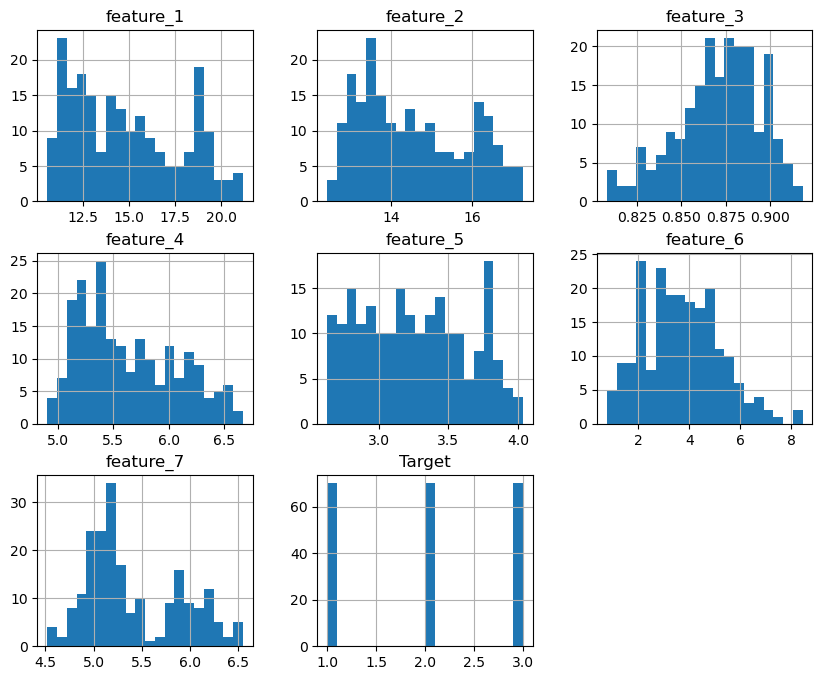

/Users/olayinkaafolabi/anaconda3/envs/ensf611/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


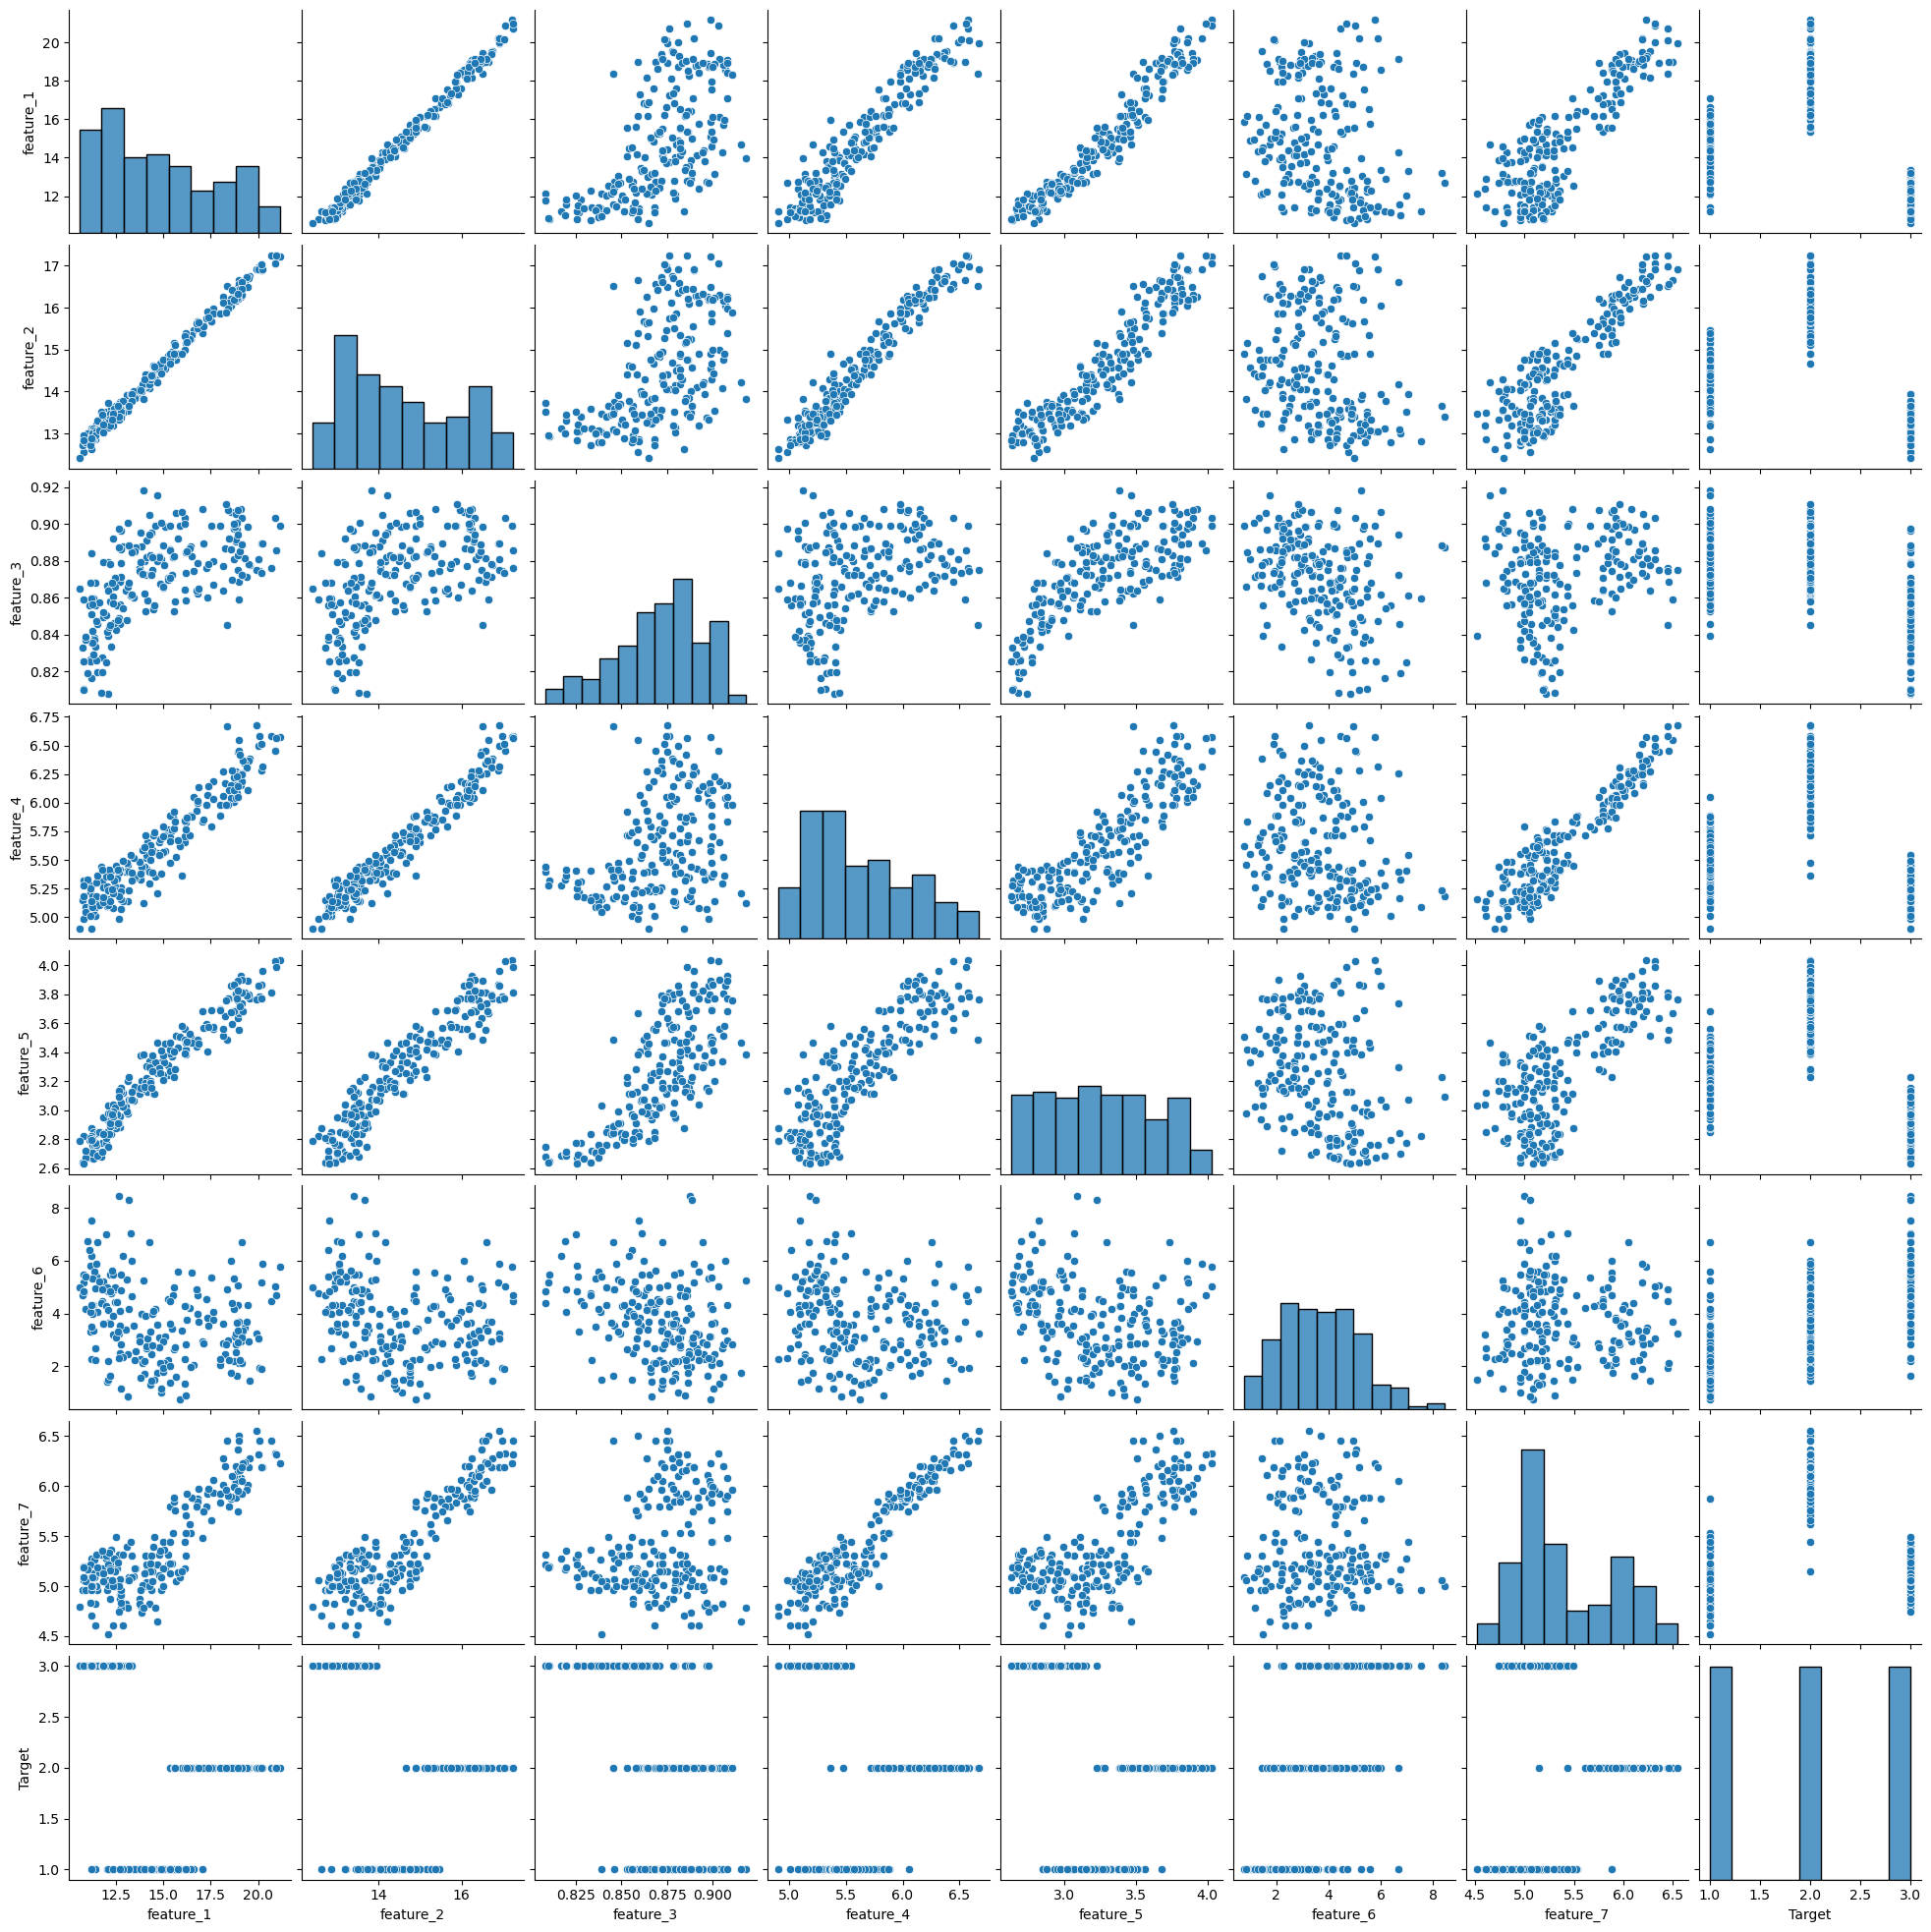

In [133]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y

X = data.drop(columns = ['Target'])
y = data['Target']

#print the shape of X and y
print("Shape of X : ", X.shape)
print("Shape of y : ", y.shape)

print(data.describe())
print(data.info())

data.hist(bins=20, figsize=(10,8))
plt.show()
sns.pairplot(data)
plt.show()

### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*
The data features seems statistically uncorrelated.The scales of measurement are different. I need to standardize them to have zero mean and unit variance. Since PCA projects data onto a set of axes that preserve the highest variance of data, I will use StandardScaler

Before we implement the scaler, we need to split the data into training and testing sets first.

In [134]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


In [135]:
# TODO: Print the shape of the training feature matrix and target vector
print("Shape of X_train:", X_train.shape)

print("Shape of y_train:", y_train.shape)


Shape of X_train: (168, 7)
Shape of y_train: (168,)


Now that we have our training data, we can implement our selected scaler.

In [136]:
# TODO: Scale the data
# Use StandardScaler to scale the features
scaler = StandardScaler()

# Fit and transform on the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the scaler fitted on the training set
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [137]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression
#instantiate the model
Lreg = LogisticRegression()

# Fit the model to the training data
Lreg.fit(X_train_scaled, y_train)


LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [138]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [139]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV

# Instantiate GridSearchCV with Logistic Regression model and parameter grid
grid_search = GridSearchCV(Lreg, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Print the cross-validation score of the best model
print("Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
test_score = best_model.score(X_test_scaled, y_test)
print("Test Score:", test_score)


Best Hyperparameters: {'C': 10.0, 'fit_intercept': True}
Cross-Validation Score: 0.9463458110516934
Test Score: 0.9285714285714286


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [141]:
# TODO: Predict y labels using best estimator


# Predict labels for the testing data
y_pred = best_model.predict(X_test_scaled)




In [145]:
# TODO: Reduce dimensions of test data for plotting

# Use PCA for dimensionality reduction
pca = PCA(n_components=2)

#Transform scaled training data
X_train_pca = pca.fit_transform(X_train_scaled)

#transform scaled test data
X_test_pca = pca.transform(X_test_scaled)


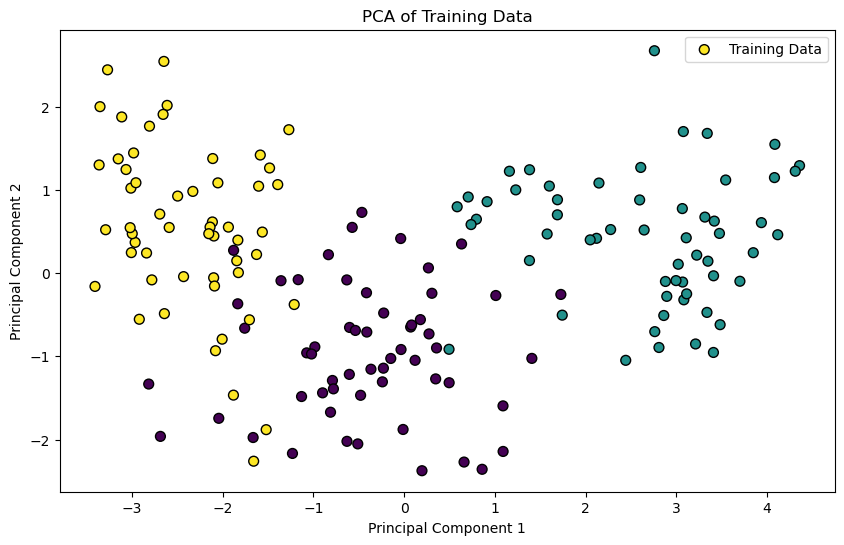

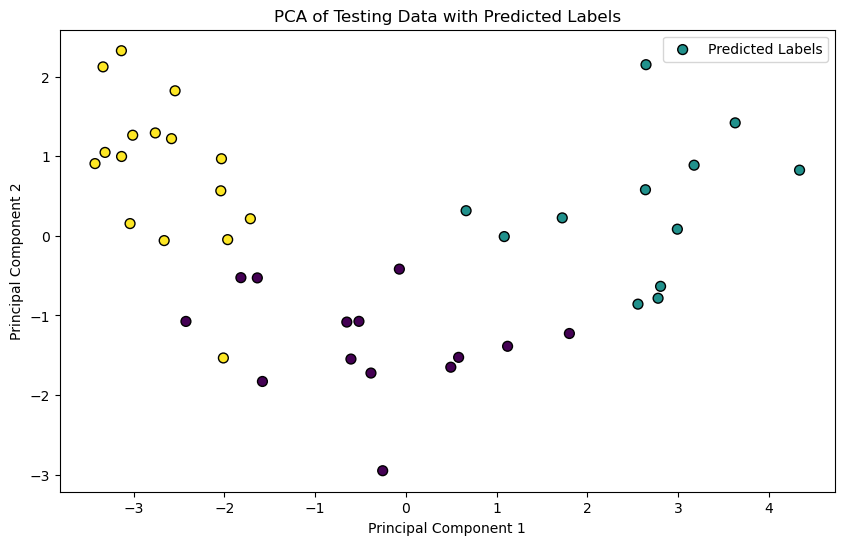

In [147]:
# TODO: Plot test points colored by predicted label

plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='k', s=50, label='Training Data')
plt.title('PCA of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Plotting the testing data with predicted labels
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k', s=50, label='Predicted Labels')
plt.title('PCA of Testing Data with Predicted Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

#### Answers

1. Yes, this model worked well. The scores for both the training and testing data were high and close together (low bias and low variance).
1. Yes it seems to have worked well. The predicted labels are grouped together nicely. Both PCA and logistic regression are both linear. We could assume that this dataset is linear, since both PCA and logistic regression worked well.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. I used the examples in the lab. I also used referenced textbook indicated in the notes material
2. Downloaded the dataset, tried to make sense of the data, cleaned the data by checking for possible Null values, Instantiate the model to be used. I separated the data into train and test data. I also fit the training data to the model. I used the various accuracy measurement to check the accuracy of the data. I then applied PCA techniques to visaulize the data.
3. No I did not
4. Yes I did. Understanding the PCA map plot was difficult. I also had to understand how changing the number of components could alter the visalization.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [106]:
# TODO: Scale feature matrix
from sklearn.cluster import KMeans
X = data.drop(columns = ['Target'])
y = data['Target']

#print the shape of X and y
print("Shape of X : ", X.shape)
print("Shape of y : ", y.shape)

scaler = StandardScaler()

# Fit and transform on the training set
X_scaler = scaler.fit_transform(X)



Shape of X :  (210, 7)
Shape of y :  (210,)


The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

/Users/olayinkaafolabi/anaconda3/envs/ensf611/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/olayinkaafolabi/anaconda3/envs/ensf611/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/olayinkaafolabi/anaconda3/envs/ensf611/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/olayinkaafolabi/anaconda3/envs/ensf611/lib/python3.11/site-packages/skle

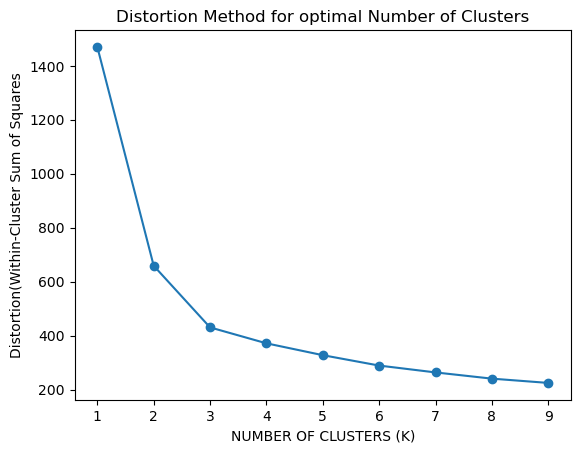

In [111]:
# TODO: Use the elbow method to determine the optimal number of clusters
#Initialize a list to store the inertia values
# starting_values = []
# for k in range(1, 10):
#     kmeans = KMeans(n_clusters = k, random_state = 0)
#     clusters = kmeans.fit_predict(X_scaler)
#     starting_values.append(-kmeans.score(X_scaler))
    
#Initialize a list to store the distortion values
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(X_scaler)
    distortions.append(kmeans.inertia_)

    
#plot the elbowcurve
plt.plot(range(1, 10), distortions,marker='o')
plt.title("Distortion Method for optimal Number of Clusters")
plt.xlabel("NUMBER OF CLUSTERS (K)")
plt.ylabel("Distortion(Within-Cluster Sum of Squares")
plt.show()


Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [112]:
# TODO: Implement K-means with the number of clusters determined in the previous step
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Initialize KMeans model with the optimal number of clusters (replace n_clusters with your chosen value)

optimal_n_clusters = 3  

kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=40)
kmeans.fit(X_scaler)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_





/Users/olayinkaafolabi/anaconda3/envs/ensf611/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [113]:
# TODO: Calculate the three different validation metrics
#Calculate validation metrics
silhouette = silhouette_score(X_scaler, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_scaler, cluster_labels)
davies_bouldin = davies_bouldin_score(X_scaler, cluster_labels)

# Print the results
print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")
print(f"Davies-Bouldin Score: {davies_bouldin}")

Silhouette Score: 0.40072705527512986
Calinski-Harabasz Score: 249.7841749161647
Davies-Bouldin Score: 0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

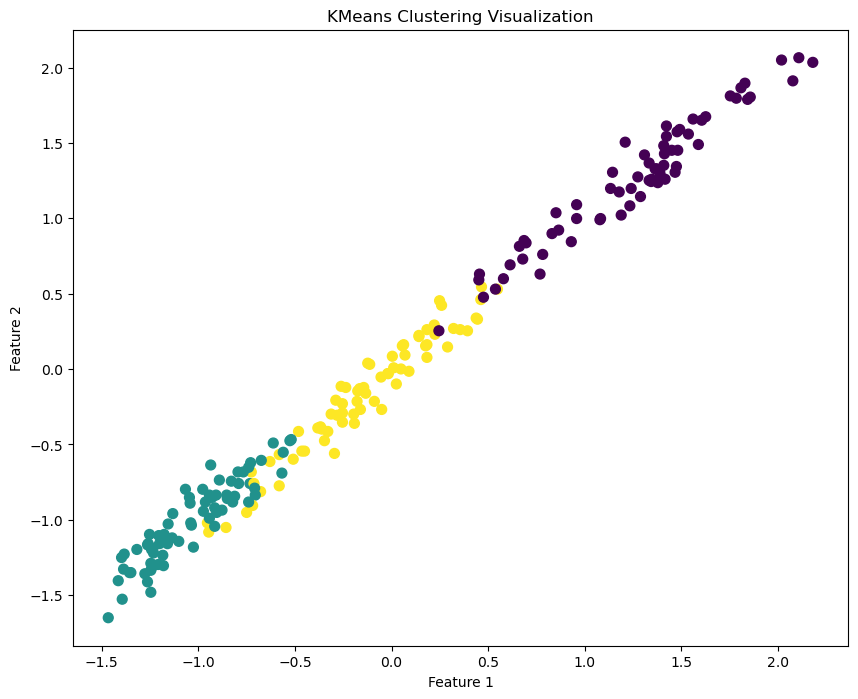

In [119]:
# TODO: Plot clustering results
dataVisualizer = pd.DataFrame(data=X_scaler, columns=X.columns)
dataVisualizer['Cluster'] = cluster_labels
plt.figure(figsize=(10,8))
plt.scatter(dataVisualizer['feature_1'], dataVisualizer['feature_2'], c=dataVisualizer['Cluster'], cmap='viridis',s=50)
plt.title('KMeans Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

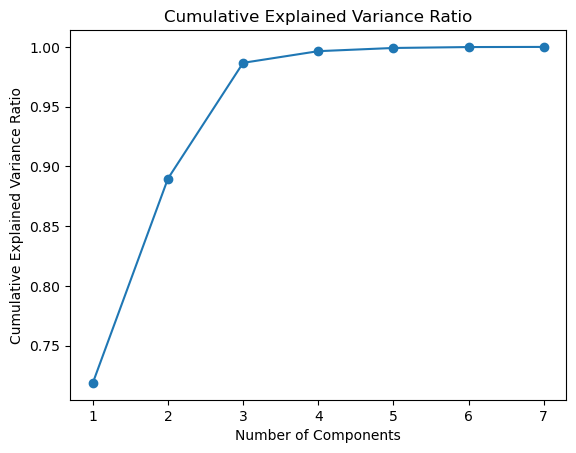

In [120]:
# TODO: Find the number of principal components using explained variance ratio
pca = PCA()
X_pca = pca.fit_transform(X_scaler)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [122]:
# TODO: Use PCA to transform the data
# from the plot i will use 3 as the number of component
ncomponent = 3
pca = PCA(n_components = ncomponent)
X_pca = pca.fit_transform(X_scaler)

In [124]:
# TODO: Implement K-means with the transformed data
kmeans = KMeans(n_clusters = ncomponent, random_state = 40)
cluster_labels = kmeans.fit_predict(X_pca)

/Users/olayinkaafolabi/anaconda3/envs/ensf611/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [125]:
# TODO: Calculate the three different validation metrics
silhouette = silhouette_score(X_pca, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_pca, cluster_labels)
davies_bouldin = davies_bouldin_score(X_pca, cluster_labels)

# Print the results
print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")
print(f"Davies-Bouldin Score: {davies_bouldin}")


Silhouette Score: 0.4100823639350389
Calinski-Harabasz Score: 260.28850656356855
Davies-Bouldin Score: 0.9030688438741864


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [130]:
# TODO: Display results
from prettytable import PrettyTable
# Print the results in a table

table = PrettyTable()
table.field_names = ['Metric', 'Score']
table.add_row(["Silhouette", silhouette])
table.add_row(["Calinski-Harabasz", calinski_harabasz])
table.add_row(["Davies-Bouldin", davies_bouldin])
print(table)

+-------------------+--------------------+
|       Metric      |       Score        |
+-------------------+--------------------+
|     Silhouette    | 0.4100823639350389 |
| Calinski-Harabasz | 260.28850656356855 |
|   Davies-Bouldin  | 0.9030688438741864 |
+-------------------+--------------------+


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

#### Answers

1. The orginal dataset had three class labels, so it makes sense that the optimal number of clusters was three.
1. Yes, the plots have similar distributions for the three classes.
1. I used two components to explain at least 95% of the variance. Yes, using PCA improved my results. Due to the curse of dimensionality, typically reducing the number of features will improve clustering accuracy results.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. I sourced my code from Sklearn website and your examples from the lecture and textbook
2. I completed my steps in the order dictated by your questions. You already arranged the questions in each steps 
3. No
4. Yes I had challenges understanding the core difference between distortion metrics and the elbow method in the context of K-means  clustering.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I do not understand the mathematics behind the metrics other than using it for machine learning. How can I understand expected result if I do no understand the fundamentals behind the mathematics that go behind the calculations. I find it interesting that the clustering worked. It is confusing the amount of possible way data can be finetuned to get the expected result.